In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
import os

In [2]:
data = pd.read_csv("breast_tumor_classification.csv")
data.info()

data.head()

data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]
data.head()

data.tail()

data['diagnosis'].value_counts()

# missing value check
data.isnull().sum()

data.drop('id', axis=1, inplace = True)
data.head()

# Select Features
feature = data.drop('diagnosis', axis=1)

# Select Target
target = data['diagnosis']

# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature, target, shuffle = True, test_size=0.3, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [3]:
#SVM classification
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)

0.935672514619883
[[108   0]
 [ 11  52]]


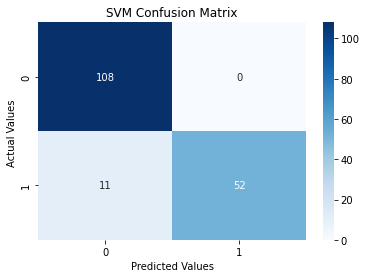

In [4]:
acc = clf.score(X_test, y_test)
confusion = sk.metrics.confusion_matrix(y_test, y_predict)
print (acc)
print (confusion)
labels = [confusion[0,0],confusion[0,1],confusion[1,0],confusion[1,1]]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(confusion, annot=labels, fmt='', cmap='Blues')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');
ax.set_title('SVM Confusion Matrix');

In [5]:
#Boosted Classification Tree
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=1, random_state=0).fit(X_train, y_train)
y_predict = clf.predict(X_test)


0.9590643274853801
[[103   5]
 [  2  61]]


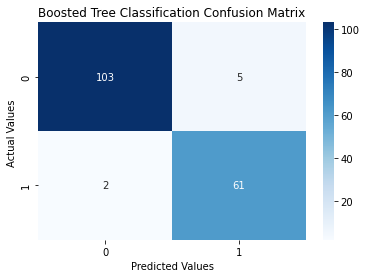

In [6]:
acc = clf.score(X_test, y_test)
confusion = sk.metrics.confusion_matrix(y_test, y_predict)
print (acc)
print (confusion)
labels = [confusion[0,0],confusion[0,1],confusion[1,0],confusion[1,1]]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(confusion, annot=labels, fmt='', cmap='Blues')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');
ax.set_title('Boosted Tree Classification Confusion Matrix');

In [7]:
#Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)

0.9532163742690059
[[106   2]
 [  6  57]]


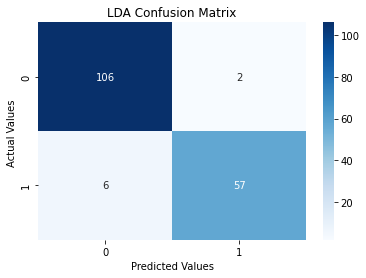

In [8]:
acc = clf.score(X_test, y_test)
confusion = sk.metrics.confusion_matrix(y_test, y_predict)
print (acc)
print (confusion)
labels = [confusion[0,0],confusion[0,1],confusion[1,0],confusion[1,1]]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(confusion, annot=labels, fmt='', cmap='Blues')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');
ax.set_title('LDA Confusion Matrix');